<a href="https://colab.research.google.com/github/BustamJos3/ia4eng_jdbs_afmp_project/blob/WorkOnModelsLearningPlots%2FBustamJos3/03_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contents
* loading from 02-preprocesado.ipynb
* partition train_test

# Modules

In [1]:
#modules
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split

# Loading

In [3]:
#load dataset from github in .json
df_prepro=pd.read_json("https://raw.githubusercontent.com/BustamJos3/ia4eng_jdbs_afmp_project/main/02preprocesado.json",orient='index')
df_prepro.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area4
0,2596.0,51.0,3.0,258,0,510,221.0,148.0,6279,0
1,2590.0,56.0,2.0,212,-6,390,220.0,151.0,6225,0
2,2804.0,139.0,9.0,268,65,3180,234.0,135.0,6121,0
3,2785.0,155.0,18.0,242,118,3090,238.0,122.0,6211,0
4,2595.0,45.0,2.0,153,-1,391,220.0,150.0,6172,0


In [4]:
#load dataset from github in .json
df_explor=pd.read_json("https://raw.githubusercontent.com/BustamJos3/ia4eng_jdbs_afmp_project/WorkOnModelsLearningPlots/BustamJos3/01exploracion.json",orient='index')['Cover_Type']
df_explor.head()

0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64

# TrainTest Splitting

In [5]:
# get x,y
X,y=df_prepro, df_explor
#TrainTestSplit 1/3 of data, shuffle data before splitting
X_train, X_testValidation, y_train, y_testValidation = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

# Hyperparameters


In [119]:
#hyperparameter selection method
from sklearn.model_selection import GridSearchCV

## Supervised

### Random forest

In [120]:
#import model
from sklearn.ensemble import RandomForestClassifier
#create model
RForest=RandomForestClassifier()

In [121]:
#which are the parameters in this case?
RForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### What are the chosen?
For this model, 3 parameters will be chosen:
* ```'n_estimators'```
* ```'max_samples'```
* ```'criterion'```

In [122]:
#dictionary with selected parameters to begin the hyperparemeter search
parameters={'criterion':('gini','entropy'),
            'n_estimators':(10,20,30),
            'max_samples':(1/4,2/4,3/4)
            }
#create gridSearch variable
gridCV_RF=GridSearchCV(RForest,parameters,scoring='accuracy')

In [124]:
#fit the grid
#fit works with numpy arrays, so .values on df's
gridCV_RF.fit(X_train.values,y_train.values)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_samples': (0.25, 0.5, 0.75),
                         'n_estimators': (10, 20, 30)},
             scoring='accuracy')

In [125]:
#ranking of combinations
print(gridCV_RF.cv_results_['rank_test_score'])
#accuracy value of combinations
print(gridCV_RF.cv_results_['mean_test_score'])

[18 16 11 15  8  5 13  6  2 17 12  9 14  7  3 10  4  1]
[0.72793682 0.74679171 0.75932873 0.75241856 0.77502468 0.77877591
 0.75607108 0.7786772  0.78548865 0.73435341 0.75636723 0.76762093
 0.75587364 0.7751234  0.78311945 0.76446199 0.78252715 0.79506417]


In [126]:
#best accuracy result
print(gridCV_RF.best_score_)
#best hyperparameter
print(gridCV_RF.best_params_)

0.7950641658440277
{'criterion': 'entropy', 'max_samples': 0.75, 'n_estimators': 30}


### K near neaighbors (KNN)

In [137]:
#import model
from sklearn.neighbors import KNeighborsClassifier
#because KNN is suceptible to the data scales
from sklearn.preprocessing import MinMaxScaler
#create model
#amount of neighbors=sqrt of amount of data
Knn=KNeighborsClassifier()

In [138]:
#what are the parameters?
Knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

#### What are the chosen?
For this model, 2 parameters will be chosen:
* ```'algorithm'```
* ```'n_neighbors'```

In [139]:
# amount of neighbors
neighbors=int(np.sqrt(len(X_train)))
#dictionary with selected parameters to begin the hyperparemeter search
parameters={'algorithm':('ball_tree','kd_tree','brute'),
            'n_neighbors':(neighbors,neighbors-30,neighbors-40)
            }
#create gridSearch variable
gridCV_knn=GridSearchCV(Knn,parameters,scoring='accuracy')

In [140]:
#fit the grid
#fit works with numpy arrays, so .values on df's
#apply scaler 'cause of suceptibility of model to data scales
scaler=MinMaxScaler().fit(X_train.values)
gridCV_knn.fit(scaler.transform(X_train.values),y_train.values)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': (100, 70, 60)},
             scoring='accuracy')

In [141]:
#ranking of combinations
print(gridCV_knn.cv_results_['rank_test_score'])
#accuracy value of combinations
print(gridCV_knn.cv_results_['mean_test_score'])

[7 4 1 7 4 1 7 4 1]
[0.62931885 0.64067127 0.64827246 0.62931885 0.64067127 0.64827246
 0.62931885 0.64067127 0.64827246]


In [142]:
#best accuracy result
print(gridCV_knn.best_score_)
#best hyperparameter
print(gridCV_knn.best_params_)

0.6482724580454098
{'algorithm': 'ball_tree', 'n_neighbors': 60}


## Unsupervised models

### K-means

In [147]:
from sklearn.cluster import KMeans
kMeans=KMeans(n_clusters=7)

In [148]:
kMeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 7,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

#### What are the chosen?
For this model, 3 parameters will be chosen:
* ```'init'```
* ```'tol'```

In [149]:
#dictionary with selected parameters to begin the hyperparemeter search
parameters={'init':('k-means++', 'random'),
            'tol': [0.001,0.0001],
            }
#create gridSearch variable
gridCV_KMeans=GridSearchCV(kMeans,parameters)

In [150]:
#fitting
gridCV_KMeans.fit(X_train.values)

GridSearchCV(estimator=KMeans(n_clusters=7),
             param_grid={'init': ('k-means++', 'random'),
                         'tol': [0.001, 0.0001]})

In [151]:
#ranking of combinations
print(gridCV_KMeans.cv_results_['rank_test_score'])

[1 3 2 4]


In [152]:
#best hyperparameter
print(gridCV_KMeans.best_params_)

{'init': 'k-means++', 'tol': 0.001}


In [154]:
#lets check its properties
bestKmeans=KMeans(n_clusters=7,init='k-means++',tol=0.001)

In [155]:
# fitting
bestKmeans.fit(X_train.values)

KMeans(n_clusters=7, tol=0.001)

In [156]:
#syntethic accuracy train
len((bestKmeans.labels_+1==y_train)[(bestKmeans.labels_+1==y_train)==True])/len(X_train)

0.23297137216189537

In [157]:
#syntethic accuracy test
len((bestKmeans.predict(X_testValidation.values)+1==y_testValidation.values)[(bestKmeans.predict(X_testValidation.values)+1==y_testValidation.values)==True])/len(X_testValidation.values)

0.22444889779559118

### MiniBatchKMeans

In [65]:
from sklearn.cluster import MiniBatchKMeans

In [66]:
miniKMeansCluster=MiniBatchKMeans(n_clusters=7)

In [67]:
miniKMeansCluster.get_params()

{'batch_size': 1024,
 'compute_labels': True,
 'init': 'k-means++',
 'init_size': None,
 'max_iter': 100,
 'max_no_improvement': 10,
 'n_clusters': 7,
 'n_init': 3,
 'random_state': None,
 'reassignment_ratio': 0.01,
 'tol': 0.0,
 'verbose': 0}

#### What are the chosen?
For this model, 3 parameters will be chosen:
* ```'affinity'```
* ```'linkage'```

In [69]:
#dictionary with selected parameters to begin the hyperparemeter search
parameters={'init':('k-means++', 'random'),
            'tol': [0.001,0.0001],
            }
gridCV_miniKC=GridSearchCV(miniKMeansCluster,parameters)

In [102]:
#fitting
gridCV_miniKC.fit(X_train.values)

GridSearchCV(estimator=MiniBatchKMeans(n_clusters=7),
             param_grid={'init': ('k-means++', 'random'),
                         'tol': [0.001, 0.0001]})

In [103]:
#ranking of combinations
print(gridCV_miniKC.cv_results_['rank_test_score'])

[2 1 4 3]


In [104]:
#best hyperparameter
print(gridCV_miniKC.best_params_)

{'init': 'k-means++', 'tol': 0.0001}


In [105]:
#lets check its properties
bestminiKmeans=MiniBatchKMeans(n_clusters=7,init='k-means++',tol=0.0001)

In [115]:
# fitting
bestminiKmeans.fit(X_train.values)

MiniBatchKMeans(n_clusters=7, tol=0.0001)

In [116]:
#syntethic accuracy train
len((bestminiKmeans.labels_+1==y_train)[(bestminiKmeans.labels_+1==y_train)==True])/len(X_train)

0.18084896347482723

In [117]:
#syntethic accuracy test
len((bestminiKmeans.predict(X_testValidation.values)+1==y_testValidation.values)[(bestminiKmeans.predict(X_testValidation.values)+1==y_testValidation.values)==True])/len(X_testValidation.values)

0.18056112224448898

# Learning curves

In [133]:
#to plotting
import matplotlib.pyplot as plt
#import function to generate learning curve data
from sklearn.model_selection import learning_curve

from sklearn.model_selection import ShuffleSplit

In [131]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

## Supervised

### Random forest and KNN

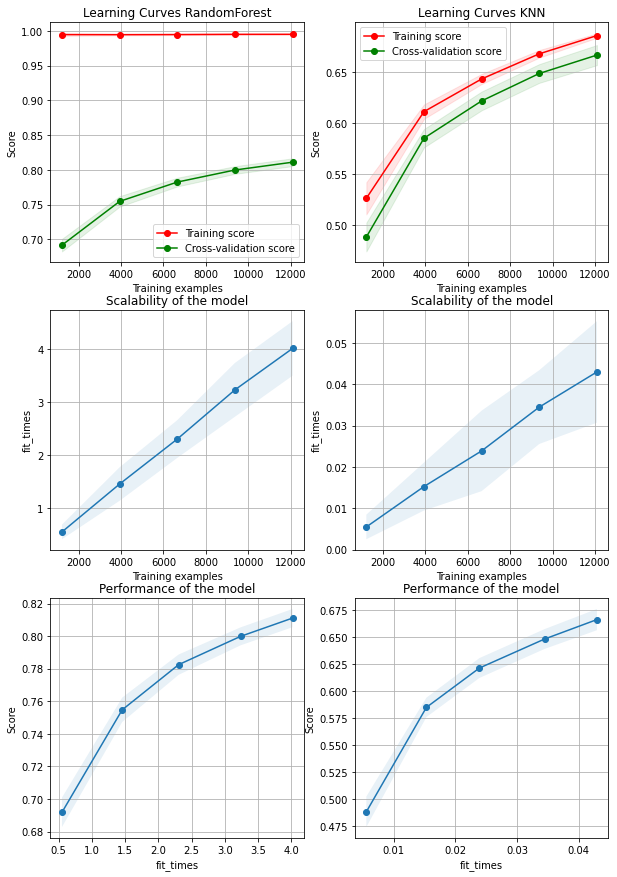

In [160]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
title = "Learning Curves RandomForest"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = gridCV_RF.best_estimator_

plot_learning_curve(
    estimator,
    title,
    df_prepro.values,
    df_explor.values,
    axes=axes[:, 0],
    ylim=None,
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

title = "Learning Curves KNN"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = gridCV_knn.best_estimator_
plot_learning_curve(
    estimator, 
    title, 
    df_prepro.values, 
    df_explor.values, 
    axes=axes[:, 1], 
    ylim=None, 
    cv=cv, 
    n_jobs=4, 
    scoring="accuracy",
)

plt.show()

# Unsupervised

## K-means and MiniBatchKMeans

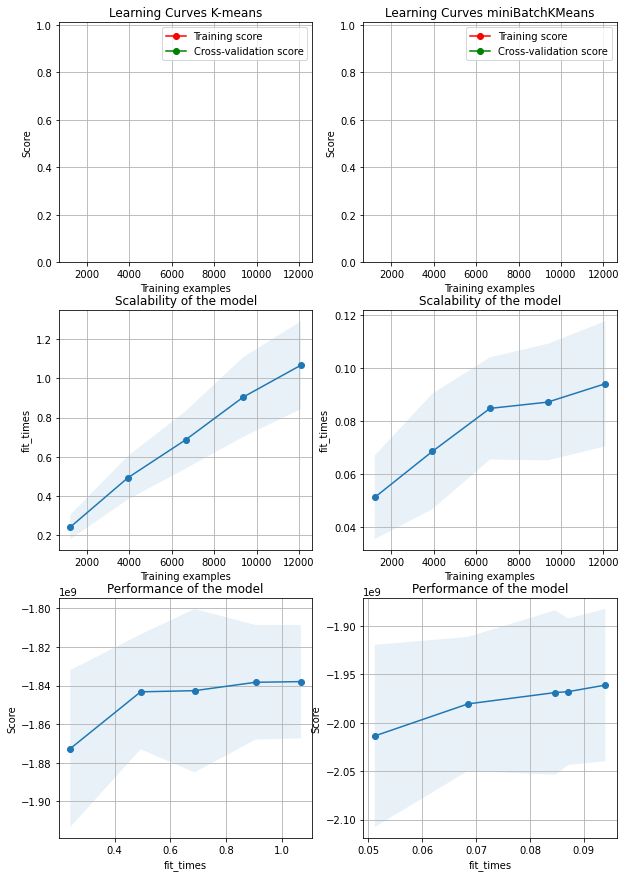

In [162]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
title = "Learning Curves K-means"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = gridCV_KMeans.best_estimator_

plot_learning_curve(
    estimator,
    title,
    df_prepro.values,
    y=None,
    axes=axes[:, 0],
    ylim=(0, 1.01),
    cv=cv,
    n_jobs=4,
    scoring=None,
)

title = "Learning Curves miniBatchKMeans"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = gridCV_miniKC.best_estimator_
plot_learning_curve(
    estimator, 
    title, 
    df_prepro.values, 
    y=None, 
    axes=axes[:, 1], 
    ylim=(0, 1.01), 
    cv=cv, 
    n_jobs=4, 
    scoring=None,
)

plt.show()